In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import datetime

In [2]:
user_data = 'relax_challenge/takehome_users.csv'
engage_data = 'relax_challenge/takehome_user_engagement.csv'

Users = pd.read_csv(user_data, encoding='unicode_escape')
Engagement = pd.read_csv(engage_data)

In [3]:
Users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [4]:
Users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


<AxesSubplot:>

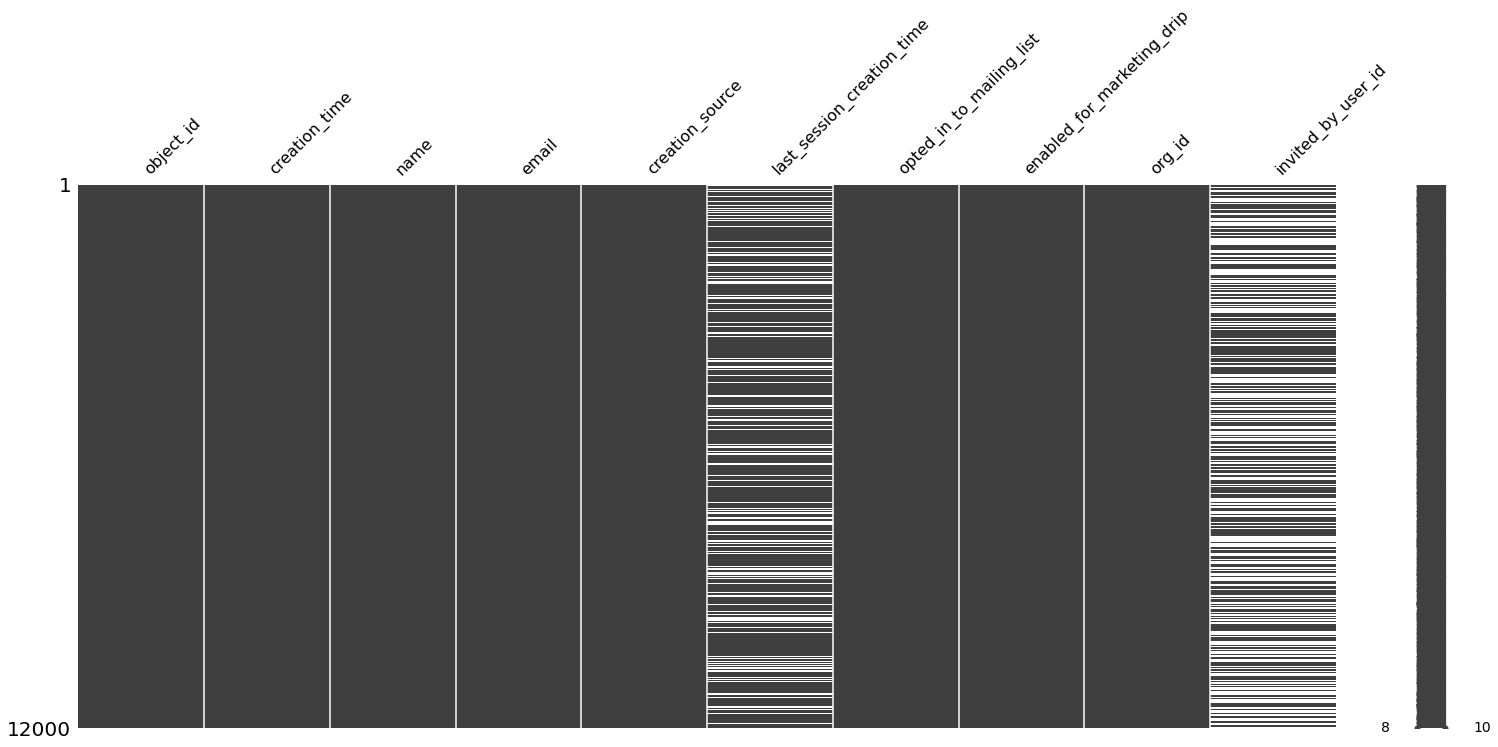

In [5]:
# Visualize missing values as a matrix

msno.matrix(Users)

In [6]:
# Converting last_session_creation_time into integers

Users = Users.fillna(0)
Users.last_session_creation_time.astype(int)

0        1398138810
1        1396237504
2        1363734892
3        1369210168
4        1358849660
            ...    
11995    1378448055
11996    1358274517
11997    1398602716
11998    1338638159
11999    1390726632
Name: last_session_creation_time, Length: 12000, dtype: int64

In [7]:
# Converting last_session_time to UTC 

Users['last_session_creation_time'] = Users['last_session_creation_time'] \
.apply(lambda x: datetime.datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'))

# datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

In [8]:
# Converting last_session_creation_time to datetime obj

Users['last_session_creation_time'] = Users['last_session_creation_time'] \
.apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

In [9]:
# Converting creation_time to datetime obj

Users['creation_time'] = Users['creation_time'] \
.apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

In [10]:
# Converting invited_by_user_id to integers

Users['invited_by_user_id'] = Users['invited_by_user_id'].astype(int)

In [11]:
# Replacing missing last_session info with creation_time values

Users['last_session_creation_time'] = Users.apply(
    lambda row: row['creation_time'] if row['last_session_creation_time'] == 0 \
    else row['last_session_creation_time'], axis=1)

In [12]:
# Extracting Domain Names from emails

Users['email'] = Users['email'].apply(lambda x: x.split('@')[1])

In [13]:
# Renaming object_id col to user_id for easier merging later

Users.rename(columns={'object_id':'user_id'}, inplace=True)

<AxesSubplot:>

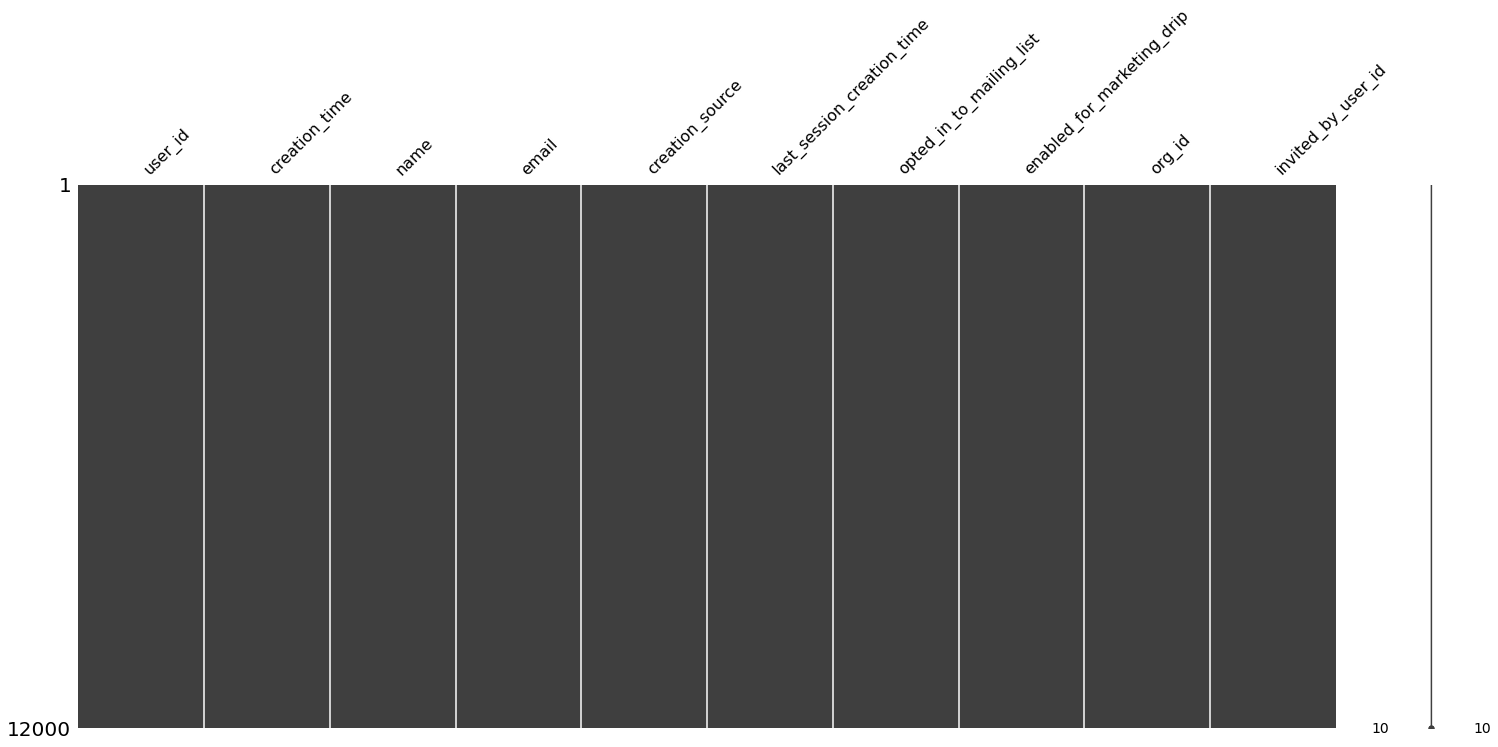

In [14]:
# Visualize missing values as a matrix

msno.matrix(Users)

In [15]:
Users.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803
1,2,2013-11-15 03:45:04,Poole Matthew,gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316
2,3,2013-03-19 23:14:52,Bottrill Mitchell,gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525
3,4,2013-05-21 08:09:28,Clausen Nicklas,yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151
4,5,2013-01-17 10:14:20,Raw Grace,yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240


In [16]:
Users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   user_id                     12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  12000 non-null  datetime64[ns]
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          12000 non-null  int64         
dtypes: datetime64[ns](2), int64(5), object(3)
memory usage: 937.6+ KB


In [17]:
Engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [18]:
Engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [19]:
# Converting time_stamp to datetime obj

Engagement['time_stamp'] = Engagement['time_stamp'] \
.apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

In [20]:
Engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [21]:
Engagement['time_stamp'] = Engagement['time_stamp'].dt.floor('d').astype(np.int64)

#sorting and remove duplicated days per users 
Engagement = Engagement.sort_values(['user_id', 'time_stamp']).drop_duplicates()

a = Engagement.groupby('user_id')['time_stamp'].rolling(window=3)
b = pd.to_timedelta((a.max()- a.min())).dt.days
print (b)

user_id        
1        0          NaN
2        1          NaN
         2          NaN
         3         24.0
         4         26.0
                   ... 
11996    207912     NaN
11997    207913     NaN
11998    207914     NaN
11999    207915     NaN
12000    207916     NaN
Name: time_stamp, Length: 207917, dtype: float64


In [22]:
# Extracting users who logged in at least 3 times
# within a 7 day period and adding to a list

c = b[b < 8].index.get_level_values('user_id').tolist()
print(c)

[2, 2, 2, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10

In [23]:
# Finding the pct of 

unique_list = []
  
count = 0

for item in c:
    if item not in unique_list:
        count += 1
        unique_list.append(item)
  
print("No of unique items are:", count)

No of unique items are: 1656


In [24]:
# Getting the pct of users considered as adopted

pct_adopted = round(( count / len(Users) ) * 100 , 2)

print("Percent adopted users are: ", pct_adopted)

Percent adopted users are:  13.8


In [25]:
# Creating func to be used to apply a 1 into
# a new col if the user_id is contained in the
# adopted list

def extractUserId(x):
    if x in c:
        return 1
    else:
        return 0

In [26]:
# Using extractUserId func to apply a 1 to a new 'adopted' col
# if the user_id is in the adopted user list 'c'

Users['adopted'] = Users['user_id'].apply(lambda x : extractUserId(x))

In [27]:
Users.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803,0
1,2,2013-11-15 03:45:04,Poole Matthew,gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151,0
4,5,2013-01-17 10:14:20,Raw Grace,yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240,0


In [28]:
# It looks like some of the last_sessions time stamps occur
# before the creation_time for some of the users. Checking
# to see how many there are. 

Users[Users['last_session_creation_time'] < Users['creation_time']].value_counts().sum()

3177

In [29]:
time_sample = Users[Users['last_session_creation_time'] < Users['creation_time']]
print(time_sample.sample(n=10))

       user_id       creation_time             name        email  \
1956      1957 2014-01-27 19:55:55  Hacking Abigail    yahoo.com   
8823      8824 2013-10-02 14:29:55     Dresdner Jan    gustr.com   
9886      9887 2013-08-25 06:16:58   Malkin Charles    gustr.com   
10509    10510 2013-09-13 01:48:36  Thomsen Camilla  hotmail.com   
6260      6261 2014-05-12 18:55:47   Pereira Felipe    ehwrq.com   
3888      3889 2013-12-12 19:51:05    Silva Douglas    yahoo.com   
5175      5176 2013-09-04 04:19:01  Araujo Beatrice  hotmail.com   
190        191 2013-07-31 10:23:21  Schmitz Vanessa    lupoa.com   
6499      6500 2013-01-02 06:32:55   Aviles Stephen  hotmail.com   
6614      6615 2014-03-19 15:41:28    Svendsen Jens  hotmail.com   

         creation_source last_session_creation_time  opted_in_to_mailing_list  \
1956          ORG_INVITE                 1970-01-01                         0   
8823          ORG_INVITE                 1970-01-01                         0   
9886   P

In [30]:
Users[Users['last_session_creation_time'] == '1970-01-01'].value_counts().sum()

3177

### It appears that the last_session_creation_time column contains ~3177 'null' values. That is, they have a value equivalent to a Unix timestamp / UTC value of 0. Since we can assume these are incorrect, we'll change these values to equal their respective creation_time values. Being nearly a quarter of the dataset, it wouldn't make sense to delete them

In [31]:
Users['last_session_creation_time'] = np.where(Users['last_session_creation_time'] == '1970-01-01', Users['creation_time'], Users['last_session_creation_time'])

In [32]:
# Ensure there are no more '1970-01-01' values anymore

Users[Users['last_session_creation_time'] == '1970-01-01'].value_counts().sum()

0

In [33]:
# Top 10 email domains

n = 10
Users['email'].value_counts()[:n].index.tolist()

['gmail.com',
 'yahoo.com',
 'jourrapide.com',
 'cuvox.de',
 'gustr.com',
 'hotmail.com',
 'mumdc.com',
 'xybhi.com',
 'xvnbr.com',
 'qgjbc.com']

In [34]:
# How frequent did oqpze.com occur?
# Guess is it is very small

Users[Users['email']=='oqpze.com'].value_counts().sum()

2

We're going to omit any email that isn't in the top 6, assign everything else to 'other'

In [35]:
email_list = ['gmail.com', 'yahoo.com', 'jourrapide.com', 'cuvox.de', 'gustr.com', 'hotmail.com']

def getEmail(x):
    if x in  email_list:
        return x
    else:
        return 'other'

Users['email'] = Users['email'].apply(lambda x : getEmail(x))

In [36]:
# Top 10 org_ids 

Users['org_id'] = Users['org_id'].astype(str)

n = 20
Users['org_id'].value_counts()[:n].index.tolist()

['0',
 '1',
 '2',
 '3',
 '4',
 '6',
 '5',
 '9',
 '7',
 '10',
 '8',
 '14',
 '12',
 '11',
 '17',
 '18',
 '13',
 '16',
 '20',
 '15']

In [37]:
org_list = ['0','1','2','3','4','6','5','9','7','10','8','14','11','12','17','18','16','13','20','15']

def getOrg(x):
    if x in  org_list:
        return x
    else:
        return 'other'

Users['org_id'] = Users['org_id'].apply(lambda x : getOrg(x))

In [38]:
# Creating dummy variables for email and creation_source

cat_variables = Users[['email','creation_source','org_id']]
cat_dummies = pd.get_dummies(cat_variables, drop_first=True)
cat_dummies.head()

,email_gmail.com,email_gustr.com,email_hotmail.com,email_jourrapide.com,email_other,email_yahoo.com,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,...,org_id_2,org_id_20,org_id_3,org_id_4,org_id_5,org_id_6,org_id_7,org_id_8,org_id_9,org_id_other
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [39]:
# Removing redundant cols and adding our dummy features back to the dataframe

new_user_df = Users.drop(['email','creation_source','org_id'], axis=1)
new_user_df = pd.concat([new_user_df, cat_dummies], axis=1)
new_user_df.head()

,user_id,creation_time,name,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,invited_by_user_id,adopted,email_gmail.com,email_gustr.com,...,org_id_2,org_id_20,org_id_3,org_id_4,org_id_5,org_id_6,org_id_7,org_id_8,org_id_9,org_id_other
0,1,2014-04-22 03:53:30,Clausen August,2014-04-22 03:53:30,1,0,10803,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2013-11-15 03:45:04,Poole Matthew,2014-03-31 03:45:04,0,0,316,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,2013-03-19 23:14:52,0,0,1525,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,4,2013-05-21 08:09:28,Clausen Nicklas,2013-05-22 08:09:28,0,0,5151,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,2013-01-17 10:14:20,Raw Grace,2013-01-22 10:14:20,0,0,5240,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [40]:
new_user_df['invited_by_user_id'] = new_user_df['invited_by_user_id'].apply(lambda x: x != 0, 1, 0)
new_user_df['invited_by_user_id'] = new_user_df['invited_by_user_id'].astype(int)
new_user_df.head()

,user_id,creation_time,name,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,invited_by_user_id,adopted,email_gmail.com,email_gustr.com,...,org_id_2,org_id_20,org_id_3,org_id_4,org_id_5,org_id_6,org_id_7,org_id_8,org_id_9,org_id_other
0,1,2014-04-22 03:53:30,Clausen August,2014-04-22 03:53:30,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2013-11-15 03:45:04,Poole Matthew,2014-03-31 03:45:04,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,2013-03-19 23:14:52,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,4,2013-05-21 08:09:28,Clausen Nicklas,2013-05-22 08:09:28,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,2013-01-17 10:14:20,Raw Grace,2013-01-22 10:14:20,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


-----

# Predicting User Adoption 

In [41]:
# Import model and metrics

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV,  RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report, roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import f1_score

In [42]:
# Create X and y variables

X = new_user_df.drop(columns=['user_id', 'creation_time', 'name', 'last_session_creation_time', 'adopted'])
y = new_user_df['adopted']

In [43]:
# Train Test Split and Scaling data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

scaler = MinMaxScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)

X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

In [44]:
# Checking shape of the train and testing sets

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(9600, 33)
(9600,)
(2400, 33)
(2400,)


In [45]:
#applying SelectKBest class to extract top 8 best features

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k=20)
fit = bestfeatures.fit(X_train_scaled,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train_scaled.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 20 best features

                                 Specs      Score
10   creation_source_PERSONAL_PROJECTS  46.971170
5                    email_hotmail.com  12.702718
12  creation_source_SIGNUP_GOOGLE_AUTH  11.993158
8                      email_yahoo.com  11.772193
32                        org_id_other  10.194925
3                      email_gmail.com   9.573031
23                            org_id_2   7.925681
18                           org_id_14   5.764379
13                            org_id_1   5.600474
2                   invited_by_user_id   5.446462
25                            org_id_3   3.420435
16                           org_id_12   2.691101
27                            org_id_5   2.613725
21                           org_id_17   2.567725
28                            org_id_6   1.873416
4                      email_gustr.com   1.851998
31                            org_id_9   1.450616
17                           org_id_13   1.162672
19                           org_id_15   0.607536


In [46]:
# Defining final X and y given results of K best

X = new_user_df[['creation_source_PERSONAL_PROJECTS', 'email_hotmail.com','creation_source_SIGNUP_GOOGLE_AUTH', \
               'email_yahoo.com', 'org_id_other', 'email_gmail.com', 'org_id_2', 'org_id_14', 'org_id_1', 'invited_by_user_id',\
               'org_id_3', 'org_id_12', 'org_id_5', 'org_id_17', 'org_id_6', 'email_gustr.com', 'org_id_9', 'org_id_13', \
               'org_id_15', 'org_id_18']]
y = new_user_df['adopted']

In [47]:
# Train Test Split and Scaling data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

scaler = MinMaxScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)

X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

In [48]:
# Checking shape of the train and testing sets

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(9600, 20)
(9600,)
(2400, 20)
(2400,)


In [49]:
#create an array of baseline models

models = []
models.append(("LR",LogisticRegression()))
models.append(("NB",GaussianNB()))
models.append(("RF",RandomForestClassifier()))
models.append(("Dtree",DecisionTreeClassifier()))
models.append(("KNN",KNeighborsClassifier()))

In [50]:
#measure the roc_auc 

for name,model in models:
    
    kfold = KFold(n_splits=3, random_state=42, shuffle=True)
    cv_result = cross_val_score(model,X_train_scaled,y_train, cv = kfold, scoring = 'roc_auc')
    print(name, cv_result)

LR [0.6126349  0.57718845 0.60960739]
NB [0.61451261 0.57750253 0.60803966]
RF [0.61856992 0.56390032 0.59324857]
Dtree [0.61961829 0.56460291 0.59405133]
KNN [0.55375313 0.51666978 0.5068039 ]


----

# Weighted Logistic Regression

In [51]:
# Define our model with No Weight as a baseline

lg1 = LogisticRegression(random_state=42, class_weight=None)

# Fit it

lg1.fit(X_train_scaled,y_train)

# Test

y_pred = lg1.predict(X_test_scaled)

In [52]:
# model performance

print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')

Accuracy Score: 0.8620833333333333
Confusion Matrix: 
[[2069    0]
 [ 331    0]]
Area Under Curve: 0.5
Recall score: 0.0


Unsurprisingly, it simply predicted the majority class

In [53]:
# We will try a weighted model w/ weights that reflect
# the imbalance in our dataset (86/14 split in majority/minority classes)
# define class weights
w = {0:14, 1:86}

# define model
lg2 = LogisticRegression(random_state=42, class_weight=w)

# fit it
lg2.fit(X_train_scaled,y_train)

# test
y_pred = lg2.predict(X_test_scaled)

# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')

Accuracy Score: 0.51375
Confusion Matrix: 
[[1019 1050]
 [ 117  214]]
Area Under Curve: 0.5695170689753357
Recall score: 0.6465256797583081


-----

# Conclusions and observations

While the results for the models are underwhelming, there are a few things that could be done to improve our predictions:

    - Oversample the minority class / Undersample the majority class
    - Explore other algorithms and/or optimize hyperparameters
    - Create a new feature that puts users in bins based on number of logins per 7d period
    - Collect more data (added features like demographic info, device types, etc)
    
With these things in mind, the next step could be to use the results as insight into how to more appropriately spend on marketing budget. Create potential reward programs to incentivize users. Identify 'at risk' users earlier on in the funnel to try and applying targeted incentives to shift them into the 'adopted' segment. 